In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns',68)
pd.set_option('display.max_rows',68)

# print(pd.__version__)

<h1>Regressão Logística <h1>

A regressão logística é um metodo de previsão para classificar um evento com duas classes, 0 ou 1 e ela faz uso da função sigmoide, já que ela é ideal para descrever o comportamento de duas classes, ela usa como base a regressão linear como variável preditora.

$$ f(Y) = \frac{1} {1 + e^-Y }$$

$$Y = \beta_0 + \beta_1*x_1 + \beta_1*x_1 + ... +  \beta_k*x_k 

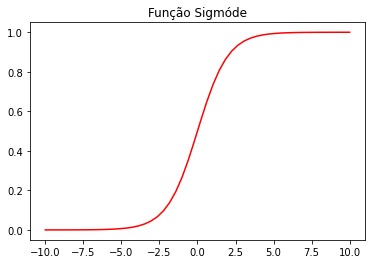

In [2]:
xlog = np.linspace(-10,10, 50)
plt.plot(xlog, 1 / (1 + np.exp(-xlog)) , color = 'red')
plt.title("Função Sigmóde")
plt.show()


Se possuímos mais de uma classe pra prever o modelo irá gerar valores 0 ou 1 para cada classe, onde na predição final para um caso apenas uma das classes terá o valor 1 enquanto as outras ficarão com 0. No caso 4 classes serão geradas 4 equações diferentes e a classe que mais se aproxima de 1 será a classe que o modelo retornará como previsão.

<h2>Avaliação de Desodorantes <h2>

Foi realizada uma pesquisa para avaliação de desodorantes onde o entrevistado responde se gostou ou não do produto com base em diversas qualidades listadas no questionario. Base de dados disponível em  https://www.kaggle.com/ramkumarr02/deodorant-instant-liking-data. <br>

In [3]:
df = pd.read_csv('Data_train_reduced.csv')

percen_faltantes = round((df.isnull().sum() / len(df['Instant.Liking']) )*100, 2)

In [4]:
# limpeza
df_desodorante = (df.drop(['q8.20', 'q8.18', 'q8.17', 'q8.8', 'q8.9', 'q8.10', 'q8.2', 
                           'Respondent.ID', 'Product', 'q1_1.personal.opinion.of.this.Deodorant'], axis='columns')).copy()

df_desodorante['q8.12'].fillna(df_desodorante['q8.12'].median(), inplace= True ) 
df_desodorante['q8.7'].fillna(df_desodorante['q8.12'].median(), inplace= True ) 

tipos = df_desodorante.dtypes

In [5]:
perc_faltantes_new = round((df_desodorante.isnull().sum() / len(df_desodorante['Instant.Liking']) )*100, 2)

In [6]:
x_des = df_desodorante.drop(['Instant.Liking'], axis='columns')
y_des = df_desodorante['Instant.Liking']

In [7]:
# Modelagem

# Separando folds
str_kfold = StratifiedKFold(n_splits=5)

#Criando modelo
modelo_log = LogisticRegression()
resultado = cross_val_score(modelo_log, x_des, y_des, cv = str_kfold)

#Acurácia
print('Acurácia de', resultado.mean())

Acurácia de 0.752


É possível utilizar os métodos de regularização Lasso e Ridge na regressão logística assim como foi feita na regressão linear, ou seja, iremos ajustar os parâmetros L1 e $\lambda$ para localizar qual o melhor valor que otimiza nossa acurácia.

In [8]:
# Valores a serem testados
Val_C = np.array([0.01, 0.1, 0.5, 1, 2, 3, 5, 10, 20, 50, 100])
regul = ['l1' , 'l2']
val_grid = {'C': Val_C, 'penalty': regul}

#Criando modelo
modelo_log1 = LogisticRegression(solver='liblinear') # Solver 'liblinear' suporta l1 e l2, 
                                                     # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#Criando Grids
procura = GridSearchCV(estimator= modelo_log1, param_grid= val_grid,  cv = 5) # Essa função testa todas as combinações possíveis
procura.fit(x_des, y_des)

#Imprimindo a melhor acurácia
print("Melhor Acurácia:", procura.best_score_)
print("Parâmetro C:", procura.best_estimator_.C)
print("Regularização:", procura.best_estimator_.penalty)


Melhor Acurácia: 0.7544
Parâmetro C: 0.5
Regularização: l1


<h3>Predição Câncer de Mama<h3>

Dados de mulheres com câncer do pacote Sklearn do Python.

In [9]:
from sklearn.datasets import load_breast_cancer
dados = load_breast_cancer()

x_can = pd.DataFrame(dados.data, columns= [dados.feature_names])
y_can = pd.Series(dados.target)

x_can.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
perc_cancer_faltantes = round((x_can.isnull().sum() / x_can.shape[0] )*100, 2)

In [11]:
# Valores a serem testados
Val_C_can = np.array([0.01, 0.1, 0.5, 1, 2, 3, 5, 10, 20, 50, 95, 100])
regul_can = ['l1' , 'l2']
val_grid_can = {'C': Val_C_can, 'penalty': regul_can}

# Modelo
modelo_log_cancer = LogisticRegression(solver='liblinear')

#Criando Grids
procura_can = GridSearchCV(estimator= modelo_log_cancer, param_grid= val_grid_can,  cv = 5) # Essa função testa todas as combinações possíveis
procura_can.fit(x_can, y_can)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.0e-02, 1.0e-01, 5.0e-01, 1.0e+00, 2.0e+00, 3.0e+00, 5.0e+00,
       1.0e+01, 2.0e+01, 5.0e+01, 9.5e+01, 1.0e+02]),
                         'penalty': ['l1', 'l2']})

In [12]:
#Imprimindo a melhor acurácia
print("Melhor Acurácia:", procura_can.best_score_)
print("Parâmetro C:", procura_can.best_estimator_.C)
print("Regularização:", procura_can.best_estimator_.penalty)

Melhor Acurácia: 0.968390001552554
Parâmetro C: 95.0
Regularização: l1


<h3>Matriz de Confusão<h3>

Também conhecida como Matriz de Erro, a matriz de Confusão é uma tabela que indica a quantidade de  *falsos positivos*, *falsos negativos*, *verdadeiros positivos* e *verdadeiros negativos* da predição de um modelo de classificação.

<ul>
<li><b>Falso Negativo:</b> Quando o modelo preve resultado positivo, porém o resultado real é negativo, é o pior tipo de erro que pode ocorrer</li>
<li><b>Falso Positivo:</b> Quando o modelo preve resultado positivo, porém o resultado real é negativo</li>
<li><b>Verdadeiro Negativo:</b> Quando o modelo preve resultado negativo, e o resultado real é de fato negativo</li>
<li><b>Verdadeiro Positivo:</b> Quando o modelo preve resultado positivo, e o resultado real é de fato positivo</li>
</ul>

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#Treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(x_can, y_can, test_size= 0.3, random_state=9)

#Modelo
modelo_cancer_final = LogisticRegression(C= 100, penalty= 'l1', solver='liblinear')
modelo_cancer_final.fit(X_treino, Y_treino)

predicao = modelo_cancer_final.predict(X_teste)

resultado = modelo_cancer_final.score(X_teste, Y_teste)

matriz = confusion_matrix(Y_teste, predicao)

resultado

0.9766081871345029

In [24]:
matriz

array([[ 59,   3],
       [  1, 108]], dtype=int64)

<h2>Sensibilidade, Especificidade e Curva ROC<h2>

<b>Sensibilidade</b> é a probabilidade de um resultado positivo de teste, dado que o indivíduo testado realmente tenha a doença (feature). O complementar da sensibilidade é o falso negativo.

<b>Especificidade</b> é a probabilidade de um resultado negativo de teste, dado que o indivíduo testado não tenha a doença (feature). O complementar da especificidade é o falso positivo.

In [27]:
sensibilidade = matriz[0,0] / (matriz[0,0] + matriz[1,0])

especificidade = matriz[0,1] / (matriz[0,1] + matriz[1,1])

print("Sensibilidade:", round(sensibilidade,2))
print("Especificidade:", round(especificidade,2))

Sensibilidade: 0.98
Especificidade: 0.03


Receiver Operator Characteristic Curve

Uma curva ROC é um gráfico de linha que plota a probabilidde de um resultado positivo verdadeiro (sensibilidade do teste) versus a probalidade de um resultado falso positivo
No geral, a sensibilidade e especificidade variam indiretamente proporcionais, na prática, é rara a
existência de um teste que seja altamente sensível e específico.

In [30]:
predicoes = modelo_cancer_final.predict_proba(X_teste)

probs = predicoes[:,1]  # Probabilidades de pertence a classe 0 ou 1, limite é de 0,5. Abixo de 0,5 classe 0

from sklearn.metrics import roc_curve

fpr, tpr, limites = roc_curve(Y_teste, probs)

In [32]:
print('TPR:',tpr)
print('FPR:',fpr)
print('Limites:',limites)

TPR: [0.         0.00917431 0.94495413 0.94495413 0.98165138 0.98165138
 0.99082569 0.99082569 1.         1.        ]
FPR: [0.         0.         0.         0.03225806 0.03225806 0.0483871
 0.0483871  0.11290323 0.11290323 1.        ]
Limites: [2.00000000e+00 9.99999998e-01 8.93188643e-01 8.83423300e-01
 7.01225205e-01 6.82363253e-01 6.20722235e-01 1.70541372e-01
 1.19692022e-01 1.02215872e-51]


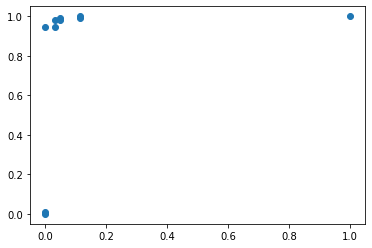

In [33]:
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.show()

In [35]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(Y_teste,probs)) # Quanto maior a área embaixo da curva ROC melhor o modelo é

0.9973364900858241
